In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk import word_tokenize
from collections import Counter

from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

import string
for punct_mark in string.punctuation:
    stopword_list.append(punct_mark)

In [27]:
df = pd.read_csv('banned_book_data_combined_lists.csv')
print(df.shape)
df.head()

(55278, 8)


,publication,author,date,year,month,day,reason,state_arc
0,[ARABIC LANGUAGE CHARACTERS].,NaN,2019-12-18 00:00:00,2019.0,12.0,18.0,NaN,fl
1,[ARABIC LANGUAGE CHARACTERS]. TAJWEED QURAN.,NaN,2021-09-09 00:00:00,2021.0,9.0,9.0,NaN,fl
2,[KOREAN LANGUAGE CHARACTERS] HOLY SPIRIT LOVE.,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl
3,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl
4,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl


In [19]:
print(f'Earliest year in this data set: {int(df["year"].min())}')
print(f'Latest year in this data set: {int(df["year"].max())}')

## Analysis is limited to data after 1990
df = df[ df['year'] > 1990]
df['year'] = df['year'].astype('int')

Earliest year in this data set: 1991
Latest year in this data set: 2022


## Annual number of bans

In [3]:
books_per_year = df.groupby('year')['publication'].count().to_dict()

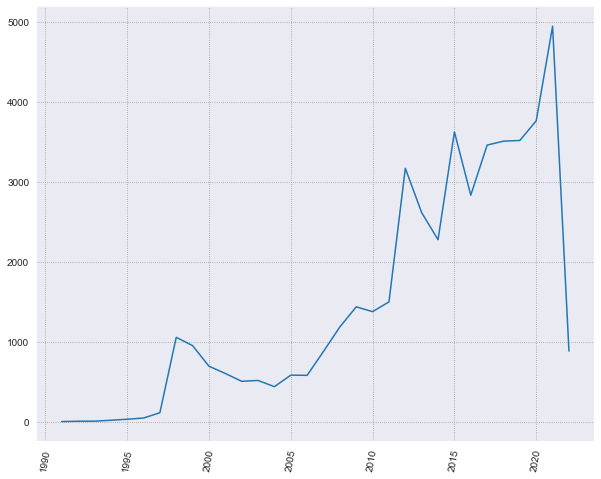

In [4]:
x_axis = list(books_per_year.keys())
y_axis = list(books_per_year.values())

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

fig = plt.figure( figsize=( 10 , 8 ) )


ax = sns.lineplot( x=x_axis , y=y_axis )
plt.xticks(rotation= 80)
plt.show()

## Has the motivation been specified in all cases?

In [52]:
nr_titles = df.shape[0]
nr_reasons_specified = df[ df['reason'].notna() ].shape[0]

print(f"The reason for the ban is given for {nr_reasons_specified} titles.")
print(f"\nThis is {round(nr_reasons_specified/nr_titles*100,2)} percent of the {nr_titles} titles in the dataset.")

The reason for the ban is given for 30229 titles.

This is 54.69 percent of the 55278 titles in the dataset.


In [68]:
count = 0

file_name = 'references_to_pages.txt'
out = open(file_name,'w',encoding='utf-8')
for i,row in df[ df['reason'].notna() ].iterrows():
    if re.search( r'(p\.\b)|(\bpages?\s+\d+\b)|(pg\.\b)', row['reason'],re.IGNORECASE):
        count += 1
        out.write(f"{df['reason']}\n")
out.close()
        
print(f'There are references to specific pages in {count} cases.')
print(f'The references can be found in a file named "{file_name}"')

There are references to specific pages in 3176 cases.
The references can be found in a file named "references_to_pages.txt"
